In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [7]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X = df.drop('diabetes',axis=1).values
y = df['diabetes'].values

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [16]:
print(X_train.shape,X_test.shape)

(460, 8) (308, 8)


In [18]:
print(y_train.shape,y_test.shape)

(460,) (308,)


In [21]:
knn = KNeighborsClassifier(n_neighbors=6)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [23]:
y_pred = knn.predict(X_test)

In [24]:
print('KNeighborsClassifier accuracy score : {}'.format(knn.score(X_test,y_test)))

KNeighborsClassifier accuracy score : 0.7207792207792207


In [25]:
print('Confusion Matrix for KNN classifier model'')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[176  30]
 [ 56  46]]


In [27]:
print('Classification report for KNN classifier model')
print(classification_report(y_test,y_pred))

Classification report
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg = LogisticRegression()

In [30]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = log_reg.predict(X_test)

In [34]:
print('Logistic regression accuracy score : {}'.format(log_reg.score(X_test,y_test)))

Logistic regression accuracy score : 0.7824675324675324


In [36]:
print('Confusion Matrix for Logistic Regression model')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix for Logistic Regression model
[[175  31]
 [ 36  66]]


In [37]:
print('Classification report for Logistic Regression model')
print(classification_report(y_test,y_pred))

Classification report for Logistic Regression model
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.68      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



In [39]:
from sklearn.metrics import roc_curve

In [42]:
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

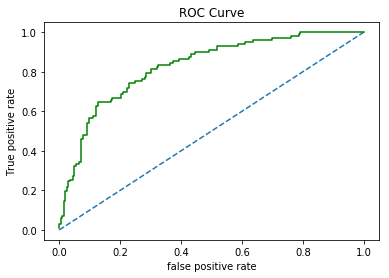

In [53]:
#plot ROC curve
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([0,1],[0,1],linestyle='--')
ax.plot(fpr,tpr,color='Green')
ax.set_xlabel('false positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC Curve')
plt.show()

In [55]:
#AUC computation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [57]:
print('AUC(area under the curve) score : {}'.format(roc_auc_score(y_test,y_pred_prob)))

AUC(area under the curve) score : 0.8266228821625738


In [58]:
#Computing AUC score with 5 fold cross validation
cv_score = cross_val_score(log_reg,X,y,cv=5,scoring='roc_auc')
print('AUC(Area Under the Curve) score with 5 fold cross validation : {}'.format(cv_score))

AUC(Area Under the Curve) score with 5 fold cross validation : [ 0.7987037   0.80777778  0.81944444  0.86641509  0.85037736]
